In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:

train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)


train_generator= train_gen.flow_from_directory('/content/drive/MyDrive/Dataset_New/Train',
                                      target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=15)
validation_generator = test_gen.flow_from_directory('/content/drive/MyDrive/Dataset_New/Test',
                                    target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=15)

Found 927 images belonging to 12 classes.
Found 568 images belonging to 12 classes.


In [8]:
# Load pre-trained DenseNet and ResNet models
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the pre-trained ResNet50 model without the top/fully-connected layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the last few layers of the pre-trained models to be trainable
for layer1 in densenet.layers:
    layer1.trainable = False
for layer2 in resnet.layers:
    layer2.trainable = False

# Set hyperparameters and configurations
num_classes = 12
batch_size = 22
learning_rate = 0.0001
num_epochs = 100

# Combine DenseNet and ResNet50 models
input_layer = tf.keras.Input(shape=(224, 224, 3))
densenet_output = densenet(input_layer)
resnet_output = resnet(input_layer)

# Add global average pooling layer
densenet1_output = GlobalAveragePooling2D()(densenet_output)
resnet1_output = GlobalAveragePooling2D()(resnet_output)

# Concatenate DenseNet and ResNet50 outputs
combined_output = tf.keras.layers.concatenate([densenet1_output, resnet1_output])

# Add batch normalization
combined1_output = BatchNormalization()(combined_output)

#dense = Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(combined_output)
#dense = Dropout(0.5)(dense)
#dense = BatchNormalization()(dense)

dense = Dense(units=175, activation='relu', kernel_regularizer=regularizers.l1(0.001))(combined1_output)
dense1 = Dropout(0.5)(dense)
dense2 = BatchNormalization()(dense1)


# Add output layer
output = Dense(units=num_classes, activation='softmax')(dense2)

# Create the model
model1 = Model(inputs=input_layer, outputs=output)

# Create the optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model1.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=early_stopping
)

Epoch 1/100
62/62 [==============================] - 37s 408ms/step - loss: 13.4959 - accuracy: 0.1294 - val_loss: 12.0426 - val_accuracy: 0.2236
Epoch 2/100
62/62 [==============================] - 21s 334ms/step - loss: 11.2492 - accuracy: 0.2578 - val_loss: 10.2336 - val_accuracy: 0.3451
Epoch 3/100
62/62 [==============================] - 21s 347ms/step - loss: 9.5776 - accuracy: 0.3236 - val_loss: 8.7442 - val_accuracy: 0.4296
Epoch 4/100
62/62 [==============================] - 21s 333ms/step - loss: 8.1797 - accuracy: 0.3851 - val_loss: 7.5440 - val_accuracy: 0.4894
Epoch 5/100
62/62 [==============================] - 22s 350ms/step - loss: 7.0183 - accuracy: 0.4779 - val_loss: 6.6318 - val_accuracy: 0.5211
Epoch 6/100
62/62 [==============================] - 21s 333ms/step - loss: 6.2734 - accuracy: 0.4973 - val_loss: 6.0029 - val_accuracy: 0.5581
Epoch 7/100
62/62 [==============================] - 22s 352ms/step - loss: 5.7429 - accuracy: 0.5318 - val_loss: 5.6377 - val_accur

In [11]:
model1.save("dn121rn50_175_e87.h5")

In [12]:
import matplotlib.pyplot as plt

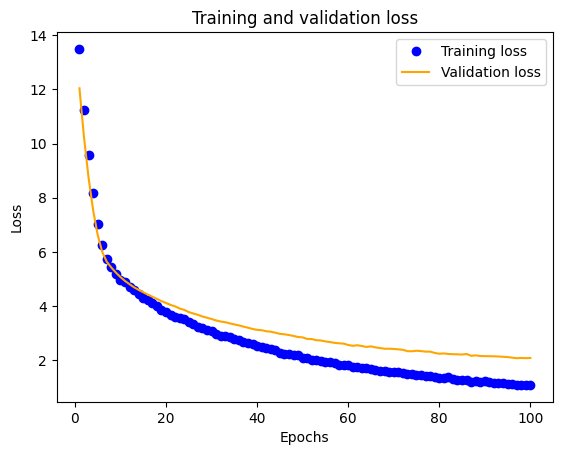

In [13]:
#for batchsize = 20
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Load pre-trained DenseNet and ResNet models
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the pre-trained ResNet50 model without the top/fully-connected layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the last few layers of the pre-trained models to be trainable
for layer1 in densenet.layers:
    layer1.trainable = False
for layer2 in resnet.layers:
    layer2.trainable = False

# Set hyperparameters and configurations
num_classes = 12
batch_size = 22
learning_rate = 0.0001
num_epochs = 100

# Combine DenseNet and ResNet50 models
input_layer = tf.keras.Input(shape=(224, 224, 3))
densenet_output = densenet(input_layer)
resnet_output = resnet(input_layer)

# Add global average pooling layer
densenet1_output = GlobalAveragePooling2D()(densenet_output)
resnet1_output = GlobalAveragePooling2D()(resnet_output)

# Concatenate DenseNet and ResNet50 outputs
combined_output = tf.keras.layers.concatenate([densenet1_output, resnet1_output])

# Add batch normalization
combined1_output = BatchNormalization()(combined_output)

#dense = Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(combined_output)
#dense = Dropout(0.5)(dense)
#dense = BatchNormalization()(dense)

dense = Dense(units=175, activation='relu', kernel_regularizer=regularizers.l1(0.01))(combined1_output)
dense1 = Dropout(0.75)(dense)
dense2 = BatchNormalization()(dense1)


# Add output layer
output = Dense(units=num_classes, activation='softmax')(dense2)

# Create the model
model2 = Model(inputs=input_layer, outputs=output)

# Create the optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model2.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=early_stopping
)

Epoch 1/100
62/62 [==============================] - 36s 401ms/step - loss: 106.1762 - accuracy: 0.0863 - val_loss: 93.6125 - val_accuracy: 0.2852
Epoch 2/100
62/62 [==============================] - 22s 363ms/step - loss: 83.7876 - accuracy: 0.1284 - val_loss: 73.3336 - val_accuracy: 0.3028
Epoch 3/100
62/62 [==============================] - 22s 358ms/step - loss: 65.3480 - accuracy: 0.1672 - val_loss: 56.6109 - val_accuracy: 0.3310
Epoch 4/100
62/62 [==============================] - 21s 343ms/step - loss: 50.1055 - accuracy: 0.2082 - val_loss: 43.2263 - val_accuracy: 0.3979
Epoch 5/100
62/62 [==============================] - 22s 352ms/step - loss: 38.3253 - accuracy: 0.2567 - val_loss: 33.1542 - val_accuracy: 0.4384
Epoch 6/100
62/62 [==============================] - 21s 337ms/step - loss: 29.8940 - accuracy: 0.2729 - val_loss: 26.4314 - val_accuracy: 0.4665
Epoch 7/100
62/62 [==============================] - 21s 335ms/step - loss: 24.8072 - accuracy: 0.2837 - val_loss: 22.9379 

In [16]:
model2.save("dn121rn50_175_e99.h5")

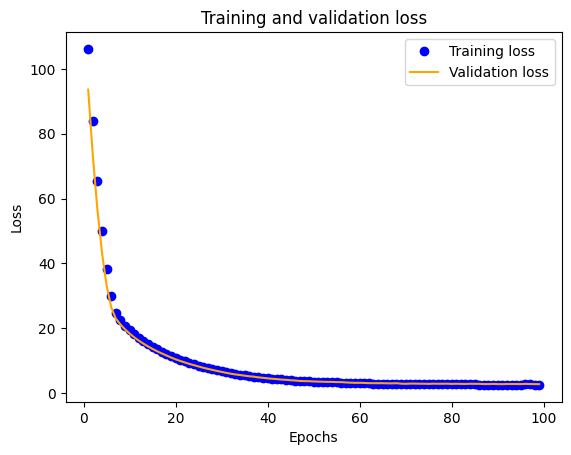

In [17]:
#for batchsize = 20
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()